In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os 
%matplotlib inline

In [12]:
#Importing the dataset
data = pd.read_csv("C:/Users/Enes/Desktop/FirstProject/Advertising_data.csv")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,1402.2500,521.745657,160.0,1037.500,1290.00,1740.000,2700.0


In [15]:
# Initializing the variables
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

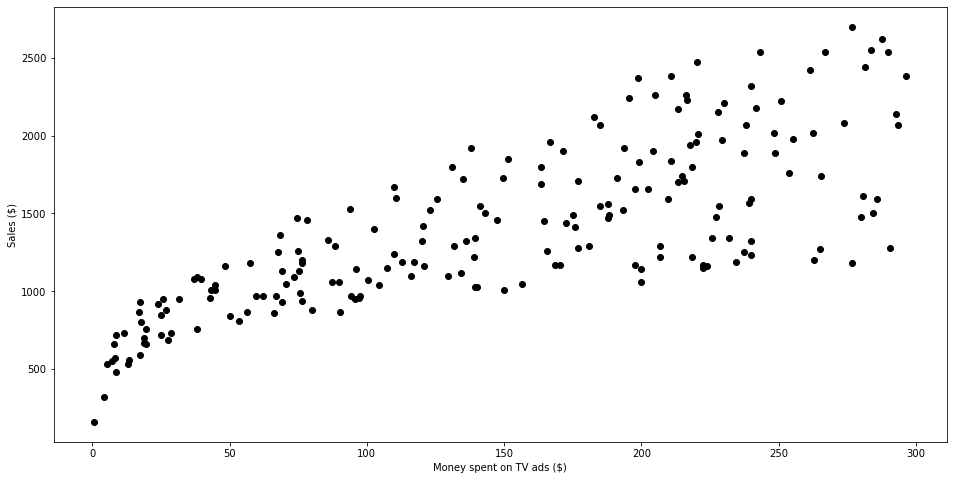

In [16]:
#Ploting a graph to see the points
plt.figure(figsize=(16,8))
plt.scatter(X,y, c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [17]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [19]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

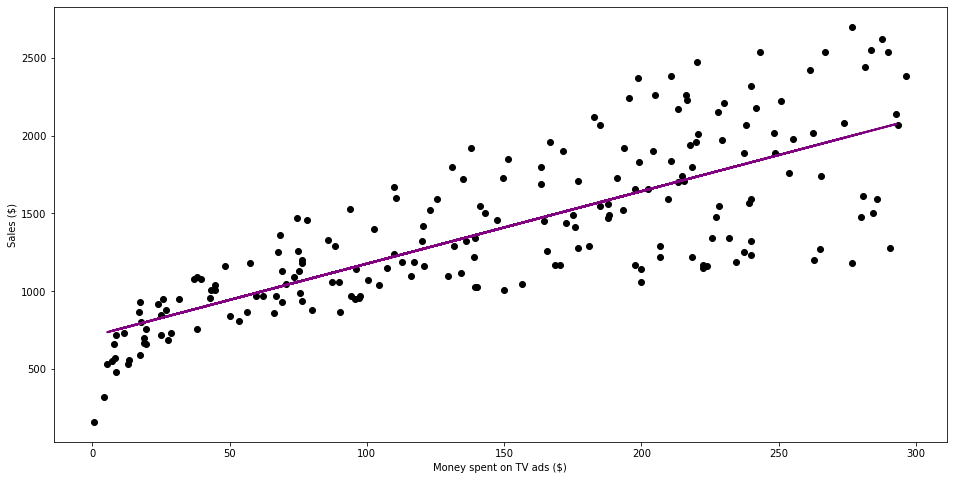

In [23]:
#Predicting the Test set result
y_pred = reg.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='purple',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [24]:
#Calculating the Coefficients
reg.coef_

array([[4.65297337]])

In [25]:
#Calculating the Intercept
reg.intercept_

array([711.96384306])

In [26]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766954295627077

In [27]:
output = reg.predict([[230.1]])
output

array([[1782.61301562]])

## Multiple Linear Regression

In [28]:
#Initializing the variables
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)

In [29]:
#Splitting our dataset to Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [32]:
#Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
multiple_reg = LinearRegression()
multiple_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
#predicting the Test set result
y_pred = multiple_reg.predict(X_test)


In [37]:
#Calculating the Coefficients
multiple_reg.coef_

array([[ 4.47295175, 18.91950542,  0.27611143]])

In [38]:
#Calculating the Intercept
multiple_reg.intercept_

array([297.90673381])

In [39]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

In [40]:
#Taking the input from the user
print("Enter the ammount you will invest on:")
tv = float(input("TV : "))
radio = float(input("Radio : "))
newspaper = float(input("Newspaper : "))

#predicting the sales with respect to the inputs
output = multiple_reg.predict([[tv,radio,newspaper]])
print("you will get Rs{:.2f} sales by advertising Rs{} on TV, Rs{} on Radio and Rs{} on newspaper."\
      .format(output[0][0] if output else "not predictable",tv,radio,newspaper))

Enter the ammount you will invest on:


TV :  100
Radio :  100
Newspaper :  100


you will get Rs2664.76 sales by advertising Rs100.0 on TV, Rs100.0 on Radio and Rs100.0 on newspaper.


In [43]:
#Saving the model
import pickle
MODEL_PATH = "C:/Users/Enes/Desktop/FirstProject/Model/multiple_reg.sav"
pickle.dump(multiple_reg, open(MODEL_PATH, 'wb'))